## DANE POGODOWE

In [5]:
#Import bibliotek
import pandas as pd
import numpy as np
import glob
import os
import matplotlib.pyplot as plt
import pyodbc 

df = pd.read_csv(r"C:\01 PRZENIESIENIE\PES SOLUTIONS\LPEC LUBLIN\01_MICHAL_SWIATECKI\Dane_pogodowe\lublin_czuby_2020.csv" 
                 ,usecols = [2,4,6,11])

df1 = pd.read_csv(r"C:\01 PRZENIESIENIE\PES SOLUTIONS\LPEC LUBLIN\01_MICHAL_SWIATECKI\Dane_pogodowe\lublin_czuby_2022_styczen_marzec.csv"
                ,usecols = [2,4,6,11])

df.columns = ['Znacznik czasu', 'DBT','WS','DHI']
df1.columns = ['Znacznik czasu', 'DBT','WS','DHI']
df = df[['Znacznik czasu','DBT','WS','DHI']]
df1 = df1[['Znacznik czasu','DBT','WS','DHI']]
df['Tzew 0.1'] = df['DBT'].apply(lambda x: round(x,1))

df['Znacznik czasu'] = pd.to_datetime(df['Znacznik czasu'])
df1['Znacznik czasu'] = pd.to_datetime(df1['Znacznik czasu'])
dane_pogodowe = df.append(df1)






In [6]:
dane_pogodowe

,Znacznik czasu,DBT,WS,DHI,Tzew 0.1
0,2020-01-01 00:00:00,2.85,7.77,0.0,2.9
1,2020-01-01 01:00:00,2.48,7.48,0.0,2.5
2,2020-01-01 02:00:00,2.60,7.13,0.0,2.6
3,2020-01-01 03:00:00,2.23,6.56,0.0,2.2
4,2020-01-01 04:00:00,1.98,6.07,0.0,2.0
...,...,...,...,...,...
2154,2022-03-31 19:00:00,2.98,5.45,0.0,NaN
2155,2022-03-31 20:00:00,2.85,5.51,0.0,NaN
2156,2022-03-31 21:00:00,2.48,5.51,0.0,NaN
2157,2022-03-31 22:00:00,2.23,5.41,0.0,NaN


## DANE DLA OPES

In [7]:
#Import bibliotek
import pandas as pd
import numpy as np
import glob
import os
import matplotlib.pyplot as plt
import pyodbc 

#Definicja kolumn w tabeli ciepłomierzy
kolumny_cieplomierze = ['Znacznik czasu', 'Energia', 'Przepływ', 'Objętość', 'Moc',
       'WP Temp Zas', 'WP Temp Pow']

#Utworzenie tabeli docelowej z kolumnami docelowymi
df_cieplomierze = pd.DataFrame(columns = kolumny_cieplomierze)


#Określenie ścieżki dostępu do folderu z plikami źródłowymi
directory = os.path.join(r"C:\01 PRZENIESIENIE\PES SOLUTIONS\LPEC LUBLIN\01_MICHAL_SWIATECKI\\Cieplomierze")
print("!!! ZACZYTYWANIE DANYCH !!!")
for root,dirs,files in os.walk(directory):
    
    for file in files:
       
        
        if file.endswith(".xlsx"):
            print(file)
            
            #Zaczytanie pliku źródłowego do tabeli źródłowej
            df_raw = pd.read_excel(f"C:\\01 PRZENIESIENIE\\PES SOLUTIONS\\LPEC LUBLIN\\01_MICHAL_SWIATECKI\\Cieplomierze\\{file}",
                                   engine="openpyxl")
            df_raw['Adres'] = file.split(sep = " ")[-1][:-5]
            #print(df_raw.columns)

            df_cieplomierze = df_cieplomierze.append(df_raw, ignore_index = True)

#Definicja kolumn w tabeli docelowej
kolumny_wezly = ['Znacznik czasu', 'P Zas WP', 'P Pow WP', 'P Zas CO', 'T Zewn',
       'T Zas CO', 'T Pow CO', 'Ster Zaw CO', 'KGRZ']

#Utworzenie tabeli docelowej z kolumnami docelowymi
df_wezly = pd.DataFrame(columns = kolumny_wezly)


#Określenie ścieżki dostępu do folderu z plikami źródłowymi
#path = "C:\01 PRZENIESIENIE\PES SOLUTIONS\LPEC LUBLIN\01_MICHAL_SWIATECKI"
directory = os.path.join(r"C:\01 PRZENIESIENIE\PES SOLUTIONS\LPEC LUBLIN\01_MICHAL_SWIATECKI\\Wezel_cieplny")
print("!!! ZACZYTYWANIE DANYCH !!!")
for root,dirs,files in os.walk(directory):
    
    for file in files:
       
        
        if file.endswith(".xlsx"):
            print(file)
            
            #Zaczytanie pliku źródłowego do tabeli źródłowej
            df_raw = pd.read_excel(f"C:\\01 PRZENIESIENIE\\PES SOLUTIONS\\LPEC LUBLIN\\01_MICHAL_SWIATECKI\\Wezel_cieplny\\{file}",
                                   engine="openpyxl")
            df_raw['Adres'] = file.split(sep = " ")[-1][:-5]
            #print(df_raw.columns)

            df_wezly = df_wezly.append(df_raw, ignore_index = True)

               

#Konwersja typu zmiennej oraz nadanie odpowiedniego formatu daty
df_wezly['Znacznik czasu'] =  pd.to_datetime(df_wezly['Znacznik czasu'], format = "%d.%m.%Y %H:%M:%S")
df_cieplomierze['Znacznik czasu'] =  pd.to_datetime(df_cieplomierze['Znacznik czasu'], format = "%d.%m.%Y %H:%M:%S")


#Zmiana indesku w dataframe
df_wezly = df_wezly.set_index('Znacznik czasu')
df_cieplomierze = df_cieplomierze.set_index('Znacznik czasu')


#Utworzenie tabeli godzinowej dla tabeli pomiarów z węzłów i ciepłomierzy
dates = [df_wezly.index.min().date(), df_wezly.index.max().date(), df_cieplomierze.index.min().date(), df_cieplomierze.index.max().date()]
min_date = min(dates)
max_date = max(dates)

time_h = pd.date_range(start = min_date, end = max_date , freq='1H')
df_time_hour = pd.DataFrame({ 'Znacznik czasu': time_h }) 


#Utworzenie tabel dla każdego obiektu osobno
df_wezly_balladyny_16 = df_wezly.loc[df_wezly['Adres'] == 'Balladyny16']
df_wezly_balladyny_18 = df_wezly.loc[df_wezly['Adres'] == 'Balladyny18']
df_wezly_balladyny_20 = df_wezly.loc[df_wezly['Adres'] == 'Balladyny20']

df_cieplomierze_balladyny_16 = df_cieplomierze.loc[df_cieplomierze['Adres'] == 'Balladyny16']
df_cieplomierze_balladyny_18 = df_cieplomierze.loc[df_cieplomierze['Adres'] == 'Balladyny18']
df_cieplomierze_balladyny_20 = df_cieplomierze.loc[df_cieplomierze['Adres'] == 'Balladyny20']


#Obliczenie wartości śrdniogodzinowych
df_wezly_mean_balladyny_16=df_wezly_balladyny_16.groupby(pd.Grouper(freq='60Min', label='right')).mean()
df_wezly_mean_balladyny_18=df_wezly_balladyny_18.groupby(pd.Grouper(freq='60Min', label='right')).mean()
df_wezly_mean_balladyny_20=df_wezly_balladyny_20.groupby(pd.Grouper(freq='60Min', label='right')).mean()

df_cieplomierze_mean_balladyny_16=df_cieplomierze_balladyny_16.groupby(pd.Grouper(freq='60Min', label='right')).mean()
df_cieplomierze_mean_balladyny_18=df_cieplomierze_balladyny_18.groupby(pd.Grouper(freq='60Min', label='right')).mean()
df_cieplomierze_mean_balladyny_20=df_cieplomierze_balladyny_20.groupby(pd.Grouper(freq='60Min', label='right')).mean()


#Utworzenie tabeli w której nie ma brakujących godzin w roku poprzez merge pomiarów oraz tabeli godzinowej
merge_wezly_balladyny_16 = pd.merge(df_time_hour, df_wezly_mean_balladyny_16, how = 'left', on = 'Znacznik czasu')
merge_wezly_balladyny_18 = pd.merge(df_time_hour, df_wezly_mean_balladyny_18, how = 'left', on = 'Znacznik czasu')
merge_wezly_balladyny_20 = pd.merge(df_time_hour, df_wezly_mean_balladyny_20, how = 'left', on = 'Znacznik czasu')
merge_cieplomierze_balladyny_16 = pd.merge(df_time_hour, df_cieplomierze_mean_balladyny_16, how = 'left', on = 'Znacznik czasu')
merge_cieplomierze_balladyny_18 = pd.merge(df_time_hour, df_cieplomierze_mean_balladyny_18, how = 'left', on = 'Znacznik czasu')
merge_cieplomierze_balladyny_20 = pd.merge(df_time_hour, df_cieplomierze_mean_balladyny_20, how = 'left', on = 'Znacznik czasu')


#Złączenie pomiarów z ciepłomierzy i liczników
balladyny_16  = pd.merge(merge_wezly_balladyny_16,merge_cieplomierze_balladyny_16 , on = 'Znacznik czasu', how = 'inner')
balladyny_18  = pd.merge(merge_wezly_balladyny_18,merge_cieplomierze_balladyny_18 ,on = 'Znacznik czasu', how = 'inner')
balladyny_20  = pd.merge(merge_wezly_balladyny_20,merge_cieplomierze_balladyny_20 , on = 'Znacznik czasu', how = 'inner')



#Zaczytanie danych pomiarówych z innego okresu
df_old_b16 = pd.read_excel(r"C:\01 PRZENIESIENIE\PES SOLUTIONS\LPEC LUBLIN\01_MICHAL_SWIATECKI\Wartości_sredniogodzinowe_sygnalow_wszystkie_pliki.xlsx", sheet_name='Balladyny_16')
df_old_b18 = pd.read_excel(r"C:\01 PRZENIESIENIE\PES SOLUTIONS\LPEC LUBLIN\01_MICHAL_SWIATECKI\Wartości_sredniogodzinowe_sygnalow_wszystkie_pliki.xlsx", sheet_name='Balladyny_18')
df_old_b20 = pd.read_excel(r"C:\01 PRZENIESIENIE\PES SOLUTIONS\LPEC LUBLIN\01_MICHAL_SWIATECKI\Wartości_sredniogodzinowe_sygnalow_wszystkie_pliki.xlsx", sheet_name='Balladyny_20')



#Edycja dataframe pod kątem wyświetlanych kolumn
balladyny_16 = balladyny_16[['Znacznik czasu', 'Moc', 'Przepływ', 'WP Temp Pow', 'WP Temp Zas', 'P Zas CO', 'T Pow CO', 'T Zas CO', 'T Zewn']]
balladyny_18 = balladyny_18[['Znacznik czasu', 'Moc', 'Przepływ', 'WP Temp Pow', 'WP Temp Zas', 'P Zas CO', 'T Pow CO', 'T Zas CO', 'T Zewn']]
balladyny_20 = balladyny_20[['Znacznik czasu', 'Moc', 'Przepływ', 'WP Temp Pow', 'WP Temp Zas', 'P Zas CO', 'T Pow CO', 'T Zas CO', 'T Zewn']]


#Zmiana nazw kolumn dla tabel z innego okresu
kolumny = balladyny_16.columns

df_old_b16.columns = kolumny
df_old_b18.columns = kolumny
df_old_b20.columns = kolumny




#Uzupełnienie braków w tabelach
balladyny_16.fillna(method = 'ffill', inplace = True)
balladyny_18.fillna(method = 'ffill', inplace = True)
balladyny_20.fillna(method = 'ffill', inplace = True)

df_old_b16.fillna(method = 'ffill', inplace = True)
df_old_b18.fillna(method = 'ffill', inplace = True)
df_old_b20.fillna(method = 'ffill', inplace = True)

#Przefiltrowanie tabel pod kątem zakresu dat aby później nie występował duplikat dat

balladyny_16 = balladyny_16.loc[balladyny_16['Znacznik czasu'] >= "2022-01-01 00:00:00" ]
balladyny_18 = balladyny_18.loc[balladyny_18['Znacznik czasu'] >= "2022-01-01 00:00:00" ]
balladyny_20 = balladyny_20.loc[balladyny_20['Znacznik czasu'] >= "2022-01-01 00:00:00" ]

df_old_b16 = df_old_b16.loc[df_old_b16['Znacznik czasu'] < '2021-01-01 00:00:00' ]
df_old_b18 = df_old_b18.loc[df_old_b18['Znacznik czasu'] < '2021-01-01 00:00:00' ]
df_old_b20 = df_old_b20.loc[df_old_b20['Znacznik czasu'] < '2021-01-01 00:00:00' ]

#Utworzenie tabeli godzinowej dla pierwszego okresu roku
min_date = balladyny_16['Znacznik czasu'].min()
max_date = balladyny_16['Znacznik czasu'].max()

time_h = pd.date_range(start = min_date, end = max_date , freq='1H')
df_time_hour_start = pd.DataFrame({ 'Znacznik czasu': time_h }) 

#Utworzenie tabeli godzinowej dla drugiego okresu roku
min_date = balladyny_16['Znacznik czasu'].max().replace(year = 2020,hour = 2)
max_date = df_old_b16['Znacznik czasu'].max()

time_h = pd.date_range(start = min_date, end = max_date , freq='1H')
df_time_hour_end = pd.DataFrame({ 'Znacznik czasu': time_h }) 


#Zmergowanie pomiarów na odpowiednie okresy roku
balladyny_16 = pd.merge(df_time_hour_start,balladyny_16,  how = 'left', on = 'Znacznik czasu')
balladyny_18 = pd.merge(df_time_hour_start,balladyny_18,  how = 'left', on = 'Znacznik czasu')
balladyny_20 = pd.merge(df_time_hour_start, balladyny_20, how = 'left', on = 'Znacznik czasu')
 
df_old_b16 = pd.merge(df_time_hour_end,df_old_b16 ,  how = 'left', on = 'Znacznik czasu')
df_old_b18 = pd.merge(df_time_hour_end,df_old_b18,  how = 'left', on = 'Znacznik czasu')
df_old_b20 = pd.merge(df_time_hour_end, df_old_b20, how = 'left', on = 'Znacznik czasu')    


#Przypisanie do pomiarów danych pogdowych z odpowiednich okresów
balladyny_16 = pd.merge(dane_pogodowe,balladyny_16,  how = 'right', on = 'Znacznik czasu')
balladyny_18 = pd.merge(dane_pogodowe,balladyny_18,  how = 'right', on = 'Znacznik czasu')
balladyny_20 = pd.merge(dane_pogodowe, balladyny_20, how = 'right', on = 'Znacznik czasu')
 
df_old_b16 = pd.merge(dane_pogodowe,df_old_b16 ,  how = 'right', on = 'Znacznik czasu')
df_old_b18 = pd.merge(dane_pogodowe,df_old_b18,  how = 'right', on = 'Znacznik czasu')
df_old_b20 = pd.merge(dane_pogodowe, df_old_b20, how = 'right', on = 'Znacznik czasu')


#Połączenie pomiarów nowych (ciepłomierze i węzły) oraz starych (inny okres)
balladyny_16 = balladyny_16.append(df_old_b16)
balladyny_18 = balladyny_18.append(df_old_b18)
balladyny_20 = balladyny_20.append(df_old_b20)

#Obliczenie nowych kolumn
balladyny_16['MOC POMIAR'] = balladyny_16['Moc']*1000
balladyny_18['MOC POMIAR'] = balladyny_18['Moc']*1000
balladyny_20['MOC POMIAR'] = balladyny_20['Moc']*1000

balladyny_16['T zewn, 0.1'] = balladyny_16['T Zewn'].apply(lambda x: round(x,1))
balladyny_18['T zewn, 0.1'] = balladyny_18['T Zewn'].apply(lambda x: round(x,1))
balladyny_20['T zewn, 0.1'] = balladyny_20['T Zewn'].apply(lambda x: round(x,1))


#Wyświetlenie kolumn w odpowiedniej kolejności

kolumny = ['Znacznik czasu', 'DBT', 'WS', 'DHI',  'T Zewn','T zewn, 0.1','Moc','MOC POMIAR', 'Przepływ', 'WP Temp Pow',
       'WP Temp Zas', 'P Zas CO', 'T Pow CO', 'T Zas CO']

balladyny_16 = balladyny_16[kolumny]
balladyny_18 = balladyny_18[kolumny]
balladyny_20 = balladyny_20[kolumny]

#Zmiana daty w pomiarach z okresu 2022 na 2020 zgodnie z założeniem analizy

balladyny_16['Znacznik czasu'] = balladyny_16['Znacznik czasu'].apply(lambda x:x.replace(year=2020))
balladyny_18['Znacznik czasu'] = balladyny_18['Znacznik czasu'].apply(lambda x:x.replace(year=2020))
balladyny_20['Znacznik czasu'] = balladyny_20['Znacznik czasu'].apply(lambda x:x.replace(year=2020))

#Uzupełnienie braków w tabelach ostatnią dostępną w tabeli wartością
df = [balladyny_16,balladyny_18,balladyny_20]
index = 0

for adres in df:
    adres.fillna(method = "ffill", inplace = True)


#Zapis danych do plików CSV
adresy = ['balladyny_16','balladyny_18','balladyny_20']
df = [balladyny_16,balladyny_18,balladyny_20]
for index, adres in enumerate(df):
    
    df[index].to_excel(f"C:\\01 PRZENIESIENIE\\PES SOLUTIONS\\LPEC LUBLIN\\01_MICHAL_SWIATECKI\\{adresy[index]}_OPES.xlsx", index = False, encoding = 'utf-8')

    


!!! ZACZYTYWANIE DANYCH !!!
Ciepłomierz 01-03.2022 Balladyny16.xlsx
Ciepłomierze 01-03.2022 Balladyny18.xlsx
Ciepłomierze 01-03.2022 Balladyny20.xlsx
Ciepłomierze 04-06.2022 Balladyny16.xlsx
Ciepłomierze 04-06.2022 Balladyny18.xlsx
Ciepłomierze 04.06.2022 Balladyny20.xlsx
!!! ZACZYTYWANIE DANYCH !!!
Węzeł cieplny 01-03.2022 Balladyny16.xlsx
Węzeł cieplny 01-03.2022 Balladyny18.xlsx
Węzeł cieplny 01-03.2022 Balladyny20.xlsx
Węzeł cieplny 04-06.2022 Balladyny16.xlsx
Węzeł cieplny 04.06.2022 Balladyny18.xlsx
Węzeł cieplny 04.06.2022 Balladyny20.xlsx


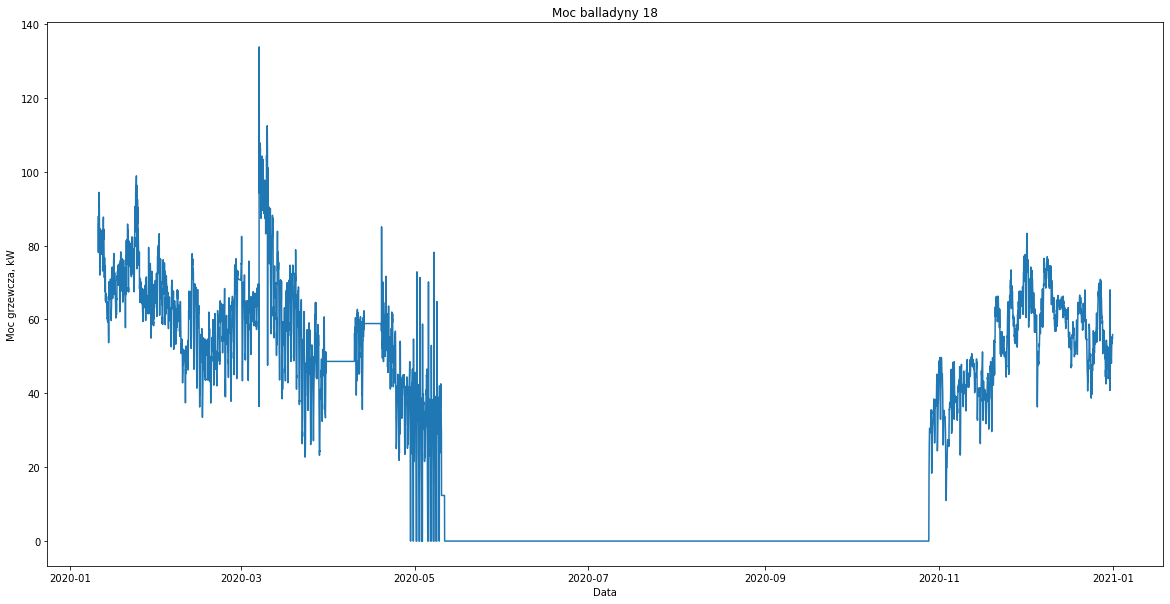

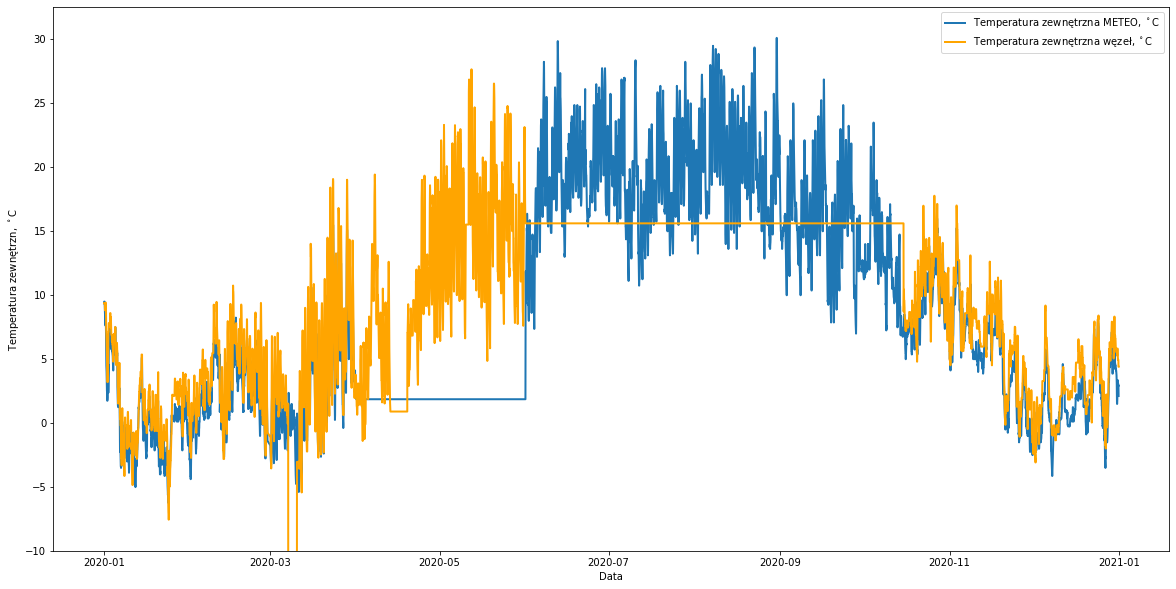

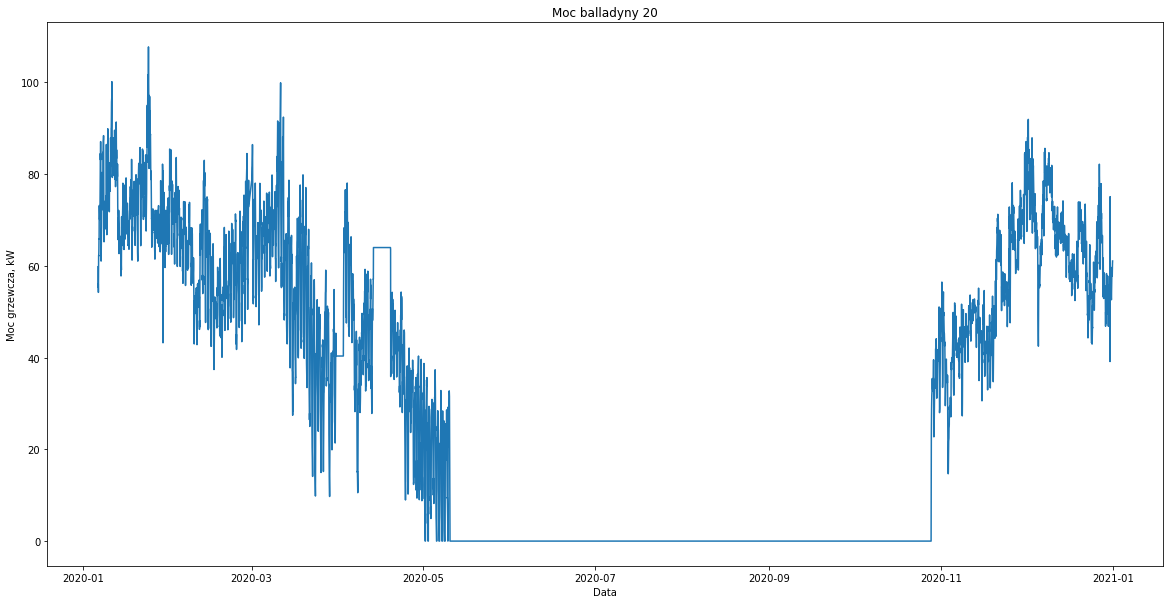

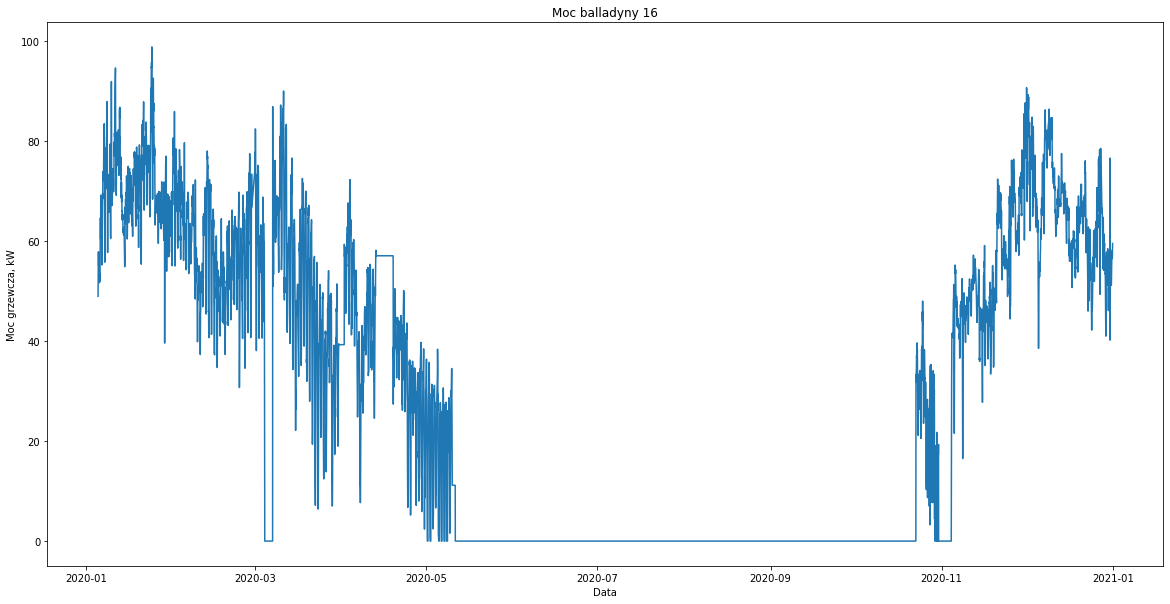

In [8]:
#Wykreślenie wykresów
#Moc balladyny 18
import matplotlib.pyplot as plt   
x = balladyny_18['Znacznik czasu'].values
y = balladyny_18['Moc'].values



fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(20)

plt.plot(x,y)
plt.xlabel("Data")
plt.ylabel("Moc grzewcza, kW")
plt.title("Moc balladyny 18")
plt.show()

#Temperatura otoczenia - METEO balladyny 18
x = balladyny_18['Znacznik czasu'].values
y = balladyny_18['DBT'].values
y1 = balladyny_18['T Zewn'].values

fig1, ax1 = plt.subplots()
fig1.set_figheight(10)
fig1.set_figwidth(20)


lns1 = ax1.plot(x, y,label="Temperatura zewnętrzna METEO, $^\circ$C ",linewidth=2)
lns2 = ax1.plot(x, y1,label="Temperatura zewnętrzna węzeł, $^\circ$C ",color = "orange",linewidth=2)

ax1.set_xlabel("Data")
ax1.set_ylabel("Temperatura zewnętrzn, $^\circ$C " )
ax1.set_ylim(-10,32.5)



lns_3 = lns1+lns2
labs_3 = [l.get_label() for l in lns_3]
ax1.legend(lns_3, labs_3, loc=0)

#Moc balladyny 20
x = balladyny_20['Znacznik czasu'].values
y = balladyny_20['Moc'].values


fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(20)

plt.plot(x,y)
plt.xlabel("Data")
plt.ylabel("Moc grzewcza, kW")
plt.title("Moc balladyny 20")
plt.show()


#Moc balladyny 16
x = balladyny_16['Znacznik czasu'].values
y = balladyny_16['Moc'].values


fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(20)
plt.plot(x,y)
plt.xlabel("Data")
plt.ylabel("Moc grzewcza, kW")
plt.title("Moc balladyny 16")
plt.show()